In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ML_EVALUTION1_29_AUG - Sheet1.csv')

In [4]:
df.head()

,Serial No.,University Rating,SOP,LOR,CGPA,12 Score,Prior Coding Level,Research,Chance of Admit
0,1,4,4.5,4.5,9.65,86.85,1,1,0.92
1,2,4,4.0,4.5,8.87,79.83,1,1,0.76
2,3,3,3.0,3.5,8.00,72.00,0,1,0.72
3,4,3,3.5,2.5,8.67,78.03,0,1,0.80
4,5,2,2.0,3.0,8.21,73.89,1,0,0.65


In [28]:
df.isnull().sum()

Serial No.            0
University Rating     0
SOP                   0
LOR                   0
CGPA                  0
12 Score              0
Prior Coding Level    0
Research              0
Chance of Admit       0
dtype: int64

In [6]:
features = df.drop(['Serial No.','Chance of Admit'], axis=1)

In [7]:
features.head()

,University Rating,SOP,LOR,CGPA,12 Score,Prior Coding Level,Research
0,4,4.5,4.5,9.65,86.85,1,1
1,4,4.0,4.5,8.87,79.83,1,1
2,3,3.0,3.5,8.00,72.00,0,1
3,3,3.5,2.5,8.67,78.03,0,1
4,2,2.0,3.0,8.21,73.89,1,0


In [18]:
label = df['Chance of Admit']

In [19]:
label.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

In [8]:
import seaborn as sns

## Finding most correlated feature

<AxesSubplot:>

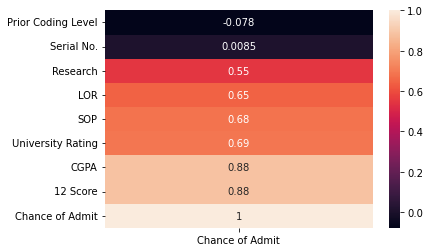

In [78]:
sns.heatmap(df.corr()[['Chance of Admit']].sort_values('Chance of Admit'), annot=True)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
scaler.fit(features[['University Rating']])
features['University Rating']= scaler.transform(features[['University Rating']])

scaler.fit(features[['SOP']])
features['SOP']= scaler.transform(features[['SOP']])

scaler.fit(features[['LOR']])
features['LOR']= scaler.transform(features[['LOR']])

scaler.fit(features[['CGPA']])
features['CGPA']= scaler.transform(features[['CGPA']])

scaler.fit(features[['12 Score']])
features['12 Score']= scaler.transform(features[['12 Score']])

scaler.fit(features[['Prior Coding Level']])
features['Prior Coding Level']= scaler.transform(features[['Prior Coding Level']])

scaler.fit(features[['Research']])
features['Research']= scaler.transform(features[['Research']])

In [16]:
features.head()

,University Rating,SOP,LOR,CGPA,12 Score,Prior Coding Level,Research
0,0.75,0.875,0.875,0.913462,0.913462,1.0,1.0
1,0.75,0.750,0.875,0.663462,0.663462,1.0,1.0
2,0.50,0.500,0.625,0.384615,0.384615,0.0,1.0
3,0.50,0.625,0.375,0.599359,0.599359,0.0,1.0
4,0.25,0.250,0.500,0.451923,0.451923,1.0,0.0


## 1) Taking the most correlated feature (Simple Linear Regression)

##  - 12 Score	

In [21]:
label.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

In [22]:
from sklearn import linear_model

In [24]:
model_1 = linear_model.LinearRegression()

In [29]:
model_1.fit(features[['12 Score']], label)

LinearRegression()

In [33]:
y_pred_1 = model_1.predict(features[['12 Score']])

### coefficients

In [30]:
model_1.coef_

array([0.64247564])

### intercept

In [31]:
model_1.intercept_

0.35593249271128724

### mean_squared_error

In [34]:
def mean_squared_error(actual, predicted):
    '''mean_squared_error is mean of square of difference between actual label and predicted label'''
    a = ((actual-predicted)*(actual-predicted)).mean()
    return a

In [35]:
mean_squared_error(label, y_pred_1)

0.004400570156519558

### mean_absolute_error

In [36]:
def mean_absolute_error(actual, predicted):
    '''mean_squared_error is mean of difference between actual label and predicted label'''
    a = (actual-predicted).mean()
    return a

In [38]:
mean_absolute_error(label, y_pred_1)

-2.19824158875781e-17

### r2_score

In [39]:
from sklearn.metrics import r2_score

In [40]:
r2_score(label, y_pred_1)

0.7786519523497208

In [76]:
def r2_score_(actual, predicted):
    ''' by using formula for r2_score = 1 - square of sdifference of actual y and predicted y / square of difference of actual y and mean y'''
    return 1-(((actual - predicted)*(actual - predicted)).sum()/((actual - actual.mean())*(actual - actual.mean())).sum())

In [68]:
r2_score_(label, y_pred_1)

0.778651952349721

### adjusted r2_score

In [102]:
def adjusted_r2_score_1(actual, predicted):
    '''used formula of adjusted r2 score '''
    a = ((1-r2_score_(actual, predicted))*(len(actual)-1))/(len(actual)-1-1)
    return 1-a                                                       

In [103]:
adjusted_r2_score_1(label, y_pred_1)

0.7782074783584554

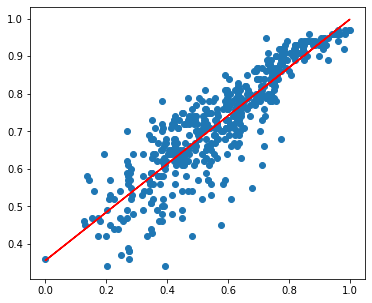

In [82]:
plt.figure(figsize=(6,5))
plt.scatter(features['12 Score'], label)
plt.plot(features['12 Score'], y_pred_1, color = 'red')

## 2) Taking the top four correlated feature (Multiple Linear Regression) and name the features

## - 12 Score	
## - CGPA
## - University Rating	
## - SOP

In [53]:
model_2 = linear_model.LinearRegression()

In [54]:
model_2.fit(features[['12 Score', 'CGPA','University Rating','SOP']], label)

LinearRegression()

In [55]:
y_pred_2 = model_2.predict(features[['12 Score', 'CGPA','University Rating','SOP']])

### coefficients

In [57]:
model_2.coef_

array([-9.54266866e+12,  9.54266866e+12,  5.18886535e-02,  3.75842676e-02])

### intercept

In [58]:
model_2.intercept_

0.35259937500000005

### mean_squared_error

In [59]:
mean_squared_error(label, y_pred_2)

0.004179274921676473

### mean_absolute_error

In [60]:
mean_absolute_error(label, y_pred_2)

0.00019654065172512126

### r2_score

In [75]:
r2_score_(label, y_pred_2)

0.7897830709194945

### adjusted r2_score

In [104]:
def adjusted_r2_score_2(actual, predicted):
    '''used formula of adjusted r2 score '''
    a = ((1-r2_score_(actual, predicted))*(len(actual)-1))/(len(actual)-4-1)
    return 1-a 

In [99]:
adjusted_r2_score_2(label, y_pred_2)

0.7880843482602581

## 3)Taking all feature (Multiple Linear Regression)


In [63]:
features.head()

,University Rating,SOP,LOR,CGPA,12 Score,Prior Coding Level,Research
0,0.75,0.875,0.875,0.913462,0.913462,1.0,1.0
1,0.75,0.750,0.875,0.663462,0.663462,1.0,1.0
2,0.50,0.500,0.625,0.384615,0.384615,0.0,1.0
3,0.50,0.625,0.375,0.599359,0.599359,0.0,1.0
4,0.25,0.250,0.500,0.451923,0.451923,1.0,0.0


In [64]:
model_3 = linear_model.LinearRegression()

In [65]:
model_3.fit(features, label)

LinearRegression()

In [66]:
y_pred_3 = model_3.predict(features)

### coefficients

In [69]:
model_3.coef_

array([ 3.62301782e-02,  1.53324023e-02,  6.01360246e-02,  3.68687877e+12,
       -3.68687877e+12, -2.89219961e-03,  3.44917821e-02])

### intercept

In [70]:
model_3.intercept_

0.35308765625000005

### mean_squared_error

In [71]:
mean_squared_error(label, y_pred_3)

0.003852833644720477

### mean_absolute_error

In [72]:
mean_absolute_error(label, y_pred_3)

-6.773338864293177e-05

### r2_score

In [73]:
r2_score_(label, y_pred_3)

0.8062030203252828

### adjusted r2_score

In [105]:
def adjusted_r2_score_3(actual, predicted):
    '''used formula of adjusted r2 score '''
    a = ((1-r2_score_(actual, predicted))*(len(actual)-1))/(len(actual)-7-1)
    return 1-a 

In [101]:
adjusted_r2_score_3(label,y_pred_3)

0.8034457462242197